# Analiza przeżycia na przykładzie zbioru colon z pakietu survival 
### Cel projektu:
Celem projektu jest zaproponowanie prostego schematu analizy przeżycia na podstawie danych dotyczących adiuwantowej chemioterapii w leczeniu osób chorych na raka jelita grubego dostępnych w pakiecie survival w R.
W ramach projektu zaproponowane zostaną modele:
1. Parametryczny
2. Nieparametryczny
3. Semiparametryczny
<br><br>
### Analiza przeżycia
Analiza przeżycia skupia się na modelowaniu czasu do zaistnienia jakiegoś zdarzenia, przykładowo takim zdarzeniem może być śmierć pacjenta lub nawrot choroby. Najczęsciej dane opierają się na badaniu prowadzonym przez jakiś określony czas na określonej próbie. Obserwację zdarzenia dla jednostki podczas okresu badania określamy jako failure, a brak obserwacji jako censoring. <br>
W analizie przeżycia chcemy określić wpływ zmiennych na prawdopodobieństwo zaistnienia danego zdarzenia. Przykładowo możemy chcieć sprawdzić, czy terapia jest efektywna w leczeniu choroby.
<br><br>
### Opis danych
Jak już zostało wspomniane do projektu użyliśmy danych dotyczących adiuwantowej chemioterapii w leczeniu osób chorych na raka jelita grubego. Dane pochodzą z pakiety R survival. Wybór tego zbioru danych był nieprzypadkowy. Dane pochodzą z prawdziwego badania oraz są relatywnie dobrze udokumentowane. <br>
Cały zbiór składa się z 16 kolumn:
-  id: id
-  study: 1 for all patients
-  rx: Treatment - Obs(ervation), Lev(amisole), Lev(amisole)+5-FU
-  sex: 1=male
-  age: in years
-  obstruct: obstruction of colon by tumour
-  perfor: perforation of colon
-  adhere: adherence to nearby organs
-  nodes: number of lymph nodes with detectable cancer
-  time: days until event or censoring
-  status: censoring status
-  differ: differentiation of tumour (1=well, 2=moderate, 3=poor)
-  extent: Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
-  surg: time from surgery to registration (0=short, 1=long)
-  node4: more than 4 positive lymph nodes
-  etype: event type: 1=recurrence,2=death


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lifelines as lfl

In [2]:
colon_df = pd.read_csv('colon.csv')

In [3]:
colon_df.head()

,time,status,study,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4,etype
0,8,1,1,3,0,32,0,0,0,14,3,2,0,1,1
1,9,1,1,3,1,55,1,0,0,5,3,3,0,1,1
2,19,1,1,1,1,59,1,0,0,2,2,3,1,0,1
3,20,1,1,2,1,66,1,0,0,4,2,3,0,0,1
4,23,0,1,3,0,52,0,0,0,3,3,3,1,0,1


In [4]:
colon_df.dropna(inplace=True)

In [5]:
colon_df = colon_df[colon_df['etype'] == 1]

In [6]:
len(colon_df)

888

In [7]:
T = colon_df['time']
E = colon_df['status']

<Axes: xlabel='timeline'>

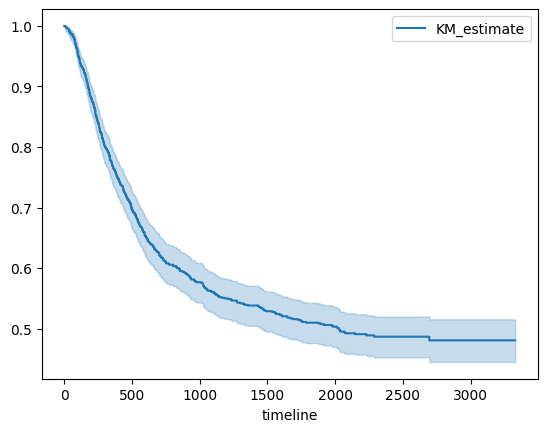

In [8]:
# Overall KM curve
kmf = lfl.KaplanMeierFitter()
kmf.fit(durations=T, event_observed=E)
kmf.plot()

In [9]:
rx1 = colon_df['rx'] == 1
rx2 = colon_df['rx'] == 2
rx3 = colon_df['rx'] == 3

<Axes: xlabel='timeline'>

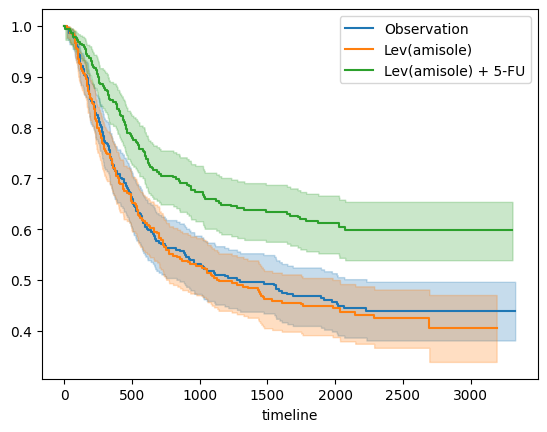

In [10]:
ax = plt.subplot(111)

kmf.fit(durations=T[rx1], event_observed=E[rx1], label='Observation')
kmf.plot(ax=ax)

kmf.fit(durations=T[rx2], event_observed=E[rx2], label='Lev(amisole)')
kmf.plot(ax=ax)

kmf.fit(durations=T[rx3], event_observed=E[rx3], label='Lev(amisole) + 5-FU')
kmf.plot(ax=ax)

In [11]:
m = colon_df['sex'] == 0

<Axes: xlabel='timeline'>

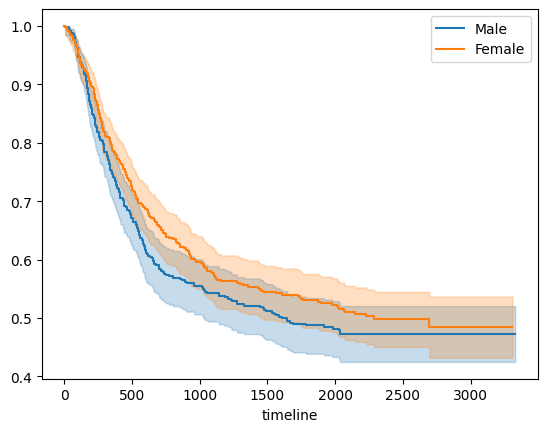

In [12]:
ax = plt.subplot(111)

kmf.fit(durations=T[m], event_observed=E[m], label='Male')
kmf.plot(ax=ax)

kmf.fit(durations=T[~m], event_observed=E[~m], label='Female')
kmf.plot(ax=ax)

In [13]:
# Cox PH model
cph = lfl.CoxPHFitter()
cph.fit(colon_df[['time', 'status', 'rx', 'sex']], duration_col='time', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 888 total observations, 442 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 888
number of events observed = 446
   partial log-likelihood = -2868.64
         time fit was run = 2025-05-10 17:32:45 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
rx        -0.23      0.80      0.06           -0.34           -0.11                0.71                0.89
sex       -0.13      0.88      0.09           -0.32            0.05                0.73                1.06

           cmp to     z      p  -log2(p)
covariate                               
rx           0.00 -3.93 <0.005     13.52
sex          0.00 -1.38   0.17      2.58
---
Concordance = 0.56
Partial AIC = 5741.28
log-likelihood ratio test = 16.98 on 2 df
-log2(p) of ll-ratio test = 12.25